In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="cricket_ml"
)


In [2]:
query = """
SELECT
    phase,
    SUM(total_extras) AS extras
FROM extras_summary
GROUP BY phase
ORDER BY extras DESC
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_28152\789258766.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,phase,extras
0,Middle,358.0
1,powerplay,316.0
2,Death,274.0


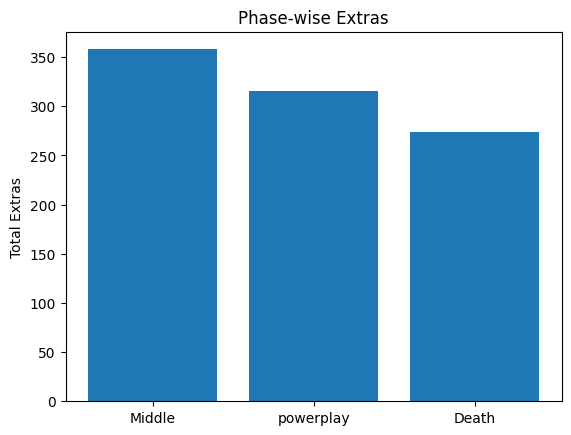

In [3]:
plt.figure()
plt.bar(df["phase"], df["extras"])
plt.ylabel("Total Extras")
plt.title("Phase-wise Extras")
plt.show()


In [4]:
query = """
SELECT
    t.team_name,
    SUM(es.total_extras) AS extras_conceded
FROM extras_summary es
JOIN team t ON es.bowler_id IN (
    SELECT player_id FROM player WHERE team_id = t.team_id
)
GROUP BY t.team_name
ORDER BY extras_conceded DESC
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_28152\3885903421.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,team_name,extras_conceded
0,Rajasthan Royals,142.0
1,Mumbai Indians,111.0
2,Chennai Super Kings,102.0
3,Punjab Kings,100.0
4,Gujarat Titans,99.0
5,Delhi Capitals,96.0
6,Lucknow Super Giants,85.0
7,Sunrisers Hyderabad,84.0
8,Kolkata Knight Riders,69.0
9,Royal Challengers Bengaluru,60.0


In [5]:
query = """
SELECT
    p.player_name AS bowler,
    SUM(es.total_extras) AS extras
FROM extras_summary es
JOIN player p ON es.bowler_id = p.player_id
GROUP BY p.player_name
ORDER BY extras DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_28152\812770471.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,bowler,extras
0,M Pathirana,40.0
1,Mohammed Siraj,37.0
2,JC Archer,37.0
3,MA Starc,37.0
4,M Theekshana,28.0
5,DL Chahar,23.0
6,Arshdeep Singh,23.0
7,HV Patel,23.0
8,SN Thakur,23.0
9,Sandeep Sharma,22.0


In [6]:
query = """
SELECT
    SUM(wides) AS wides,
    SUM(no_balls) AS no_balls,
    SUM(byes) AS byes,
    SUM(leg_byes) AS leg_byes
FROM extras_summary
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_28152\3488796703.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,wides,no_balls,byes,leg_byes
0,561.0,52.0,24.0,160.0


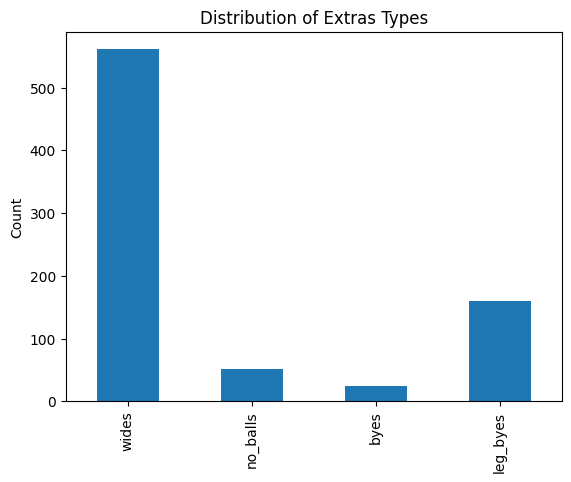

In [7]:
df.T.plot(kind="bar", legend=False)
plt.ylabel("Count")
plt.title("Distribution of Extras Types")
plt.show()


In [8]:
query = """
SELECT
    phase,
    SUM(wides) AS wides,
    SUM(no_balls) AS no_balls,
    SUM(byes) AS byes,
    SUM(leg_byes) AS leg_byes
FROM extras_summary
GROUP BY phase
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_28152\2334036667.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,phase,wides,no_balls,byes,leg_byes
0,Middle,225.0,16.0,11.0,56.0
1,Death,175.0,17.0,7.0,46.0
2,powerplay,161.0,19.0,6.0,58.0


C:\Users\hp\AppData\Local\Temp\ipykernel_28152\2700436363.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


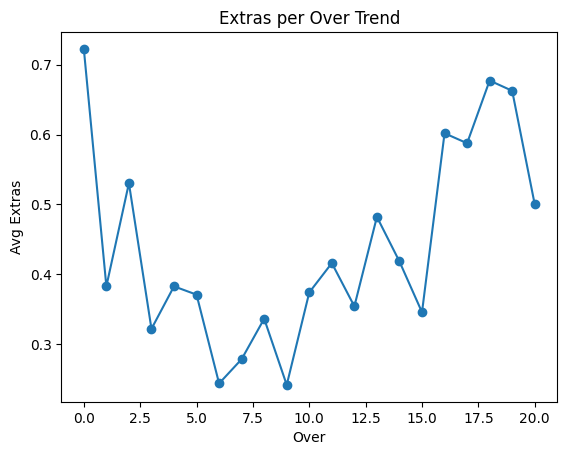

In [9]:
query = """
SELECT
    over_number,
    AVG(total_extras) AS avg_extras
FROM extras_summary
GROUP BY over_number
ORDER BY over_number
"""
df = pd.read_sql(query, conn)

plt.figure()
plt.plot(df["over_number"], df["avg_extras"], marker="o")
plt.xlabel("Over")
plt.ylabel("Avg Extras")
plt.title("Extras per Over Trend")
plt.show()
